In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df_1_3 = pd.read_excel('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/exp.xlsx', sheet_name='1-3')
df_4_bgpd_gbm = pd.read_excel('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/exp.xlsx', sheet_name='4 BGPD -> GBM')
df_4_gbm_bgpd = pd.read_excel('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/exp.xlsx', sheet_name='4 GBM -> BGPD')

In [17]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean()

/tmp/ipykernel_10627/3039216364.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean()


Preprocessing step
gbm_1_reg_train      0.423333
gbm_2a_interp        0.830931
gbm_3a_atlas         0.836020
gbm_4a_resamp_100    0.837206
gbm_4b_n4            0.827157
gbm_4d_susan         0.837922
gbm_5_ss_shared      0.860069
gbm_6_hist           0.820549
Name: Dice, dtype: float64

In [19]:
df_4_bgpd_gbm.groupby([ 'Preprocessing step']).mean().Dice

Preprocessing step
gbm_1_reg_train_from_bgpd_TL        0.431588
gbm_2a_interp_from_bgpd_TL          0.857539
gbm_3a_atlas_from_bgpd_TL           0.863745
gbm_4a_resamp_from_bgpd_TL          0.855892
gbm_4b_n4_from_bgpd_TL_last_bgpd    0.849775
gbm_4d_susan_from_bgpd_TL           0.862912
gbm_5_ss_shared_from_bgpd_TL        0.866824
gbm_6_hist_bgpd_TL                  0.835206
Name: Dice, dtype: float64

In [3]:
gbm_mean_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100

gbm_mean_300_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100

gbm_std_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.std().values, 2)*100

gbm_std_300_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.std().values, 2)*100

bgpd_gbm_mean_raw = np.round(df_4_bgpd_gbm.groupby([ 'Preprocessing step']).mean().Dice.values, 2)*100

bgpd_gbm_std_raw = np.round(df_4_bgpd_gbm.groupby([ 'Preprocessing step']).std().Dice.values, 2)*100

mean_transfer_raw=  bgpd_gbm_mean_raw - gbm_mean_100_raw

std_transfer_raw=  bgpd_gbm_std_raw - gbm_std_100_raw 

/tmp/ipykernel_10627/3712079836.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gbm_mean_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100
/tmp/ipykernel_10627/3712079836.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gbm_mean_300_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100
/tmp/ipykernel_10627/3712079836.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gbm_std_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Pre

In [15]:
mean_transfer_raw

array([1., 3., 2., 2., 2., 2., 1., 2.])

In [16]:
std_transfer_raw

array([ 0., -3., -2., -2., -2., -2.,  0.,  0.])

In [20]:
mean_100 = np.array([42, 83, 84, 84, 83, 84, 82, 86])
std_100 =  np.array([27, 13, 12, 13, 13, 12, 16, 11])

mean_transfer = np.array([1, 3, 2, 2, 2, 2, 2, 1])
std_transfer = np.array([0,-3, -2, -2, -2, -2, 0, 0])

mean_transfer = mean_100 + mean_transfer
std_transfer = std_100 + std_transfer

mean_300 = np.array([44, 85, 85, 85, 82, 84, 83, 87])
std_300 =  np.array([28, 11, 11, 12, 13, 12, 16, 11])

y = np.array([1,2,3,4,5,6,7,8])*5

ylabel = ['1. Inter-modality\nregistration', '2. Resampling to \nimage size',
         '3. Atlas \nregistration', '4. Resampling to \nspacing', '4.a Bias field \ncorrection',
         '4.b Denoising', '4.c Histogram \n matching', '4.d Skull \nstripping',]

In [21]:
def plot_err_bar(x, y, error, c, label):
    plt.scatter(x, y, c=c, s=20, label=label)
    for _x, _y, err in zip(x,y,error):
        plt.plot([_x-err/2, _x+err/2], [_y, _y], c=c, alpha=0.5)

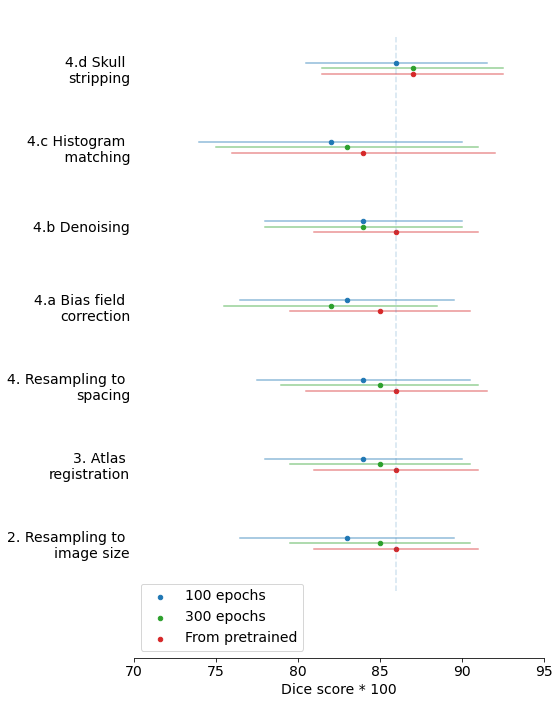

In [24]:
font = {'size'   : 14}
plt.rc('font', **font)


plt.figure(figsize=(8,10))
plot_err_bar(mean_100, y+0.35, std_100, c='tab:blue', label='100 epochs')
plot_err_bar(mean_300, y, std_300, c='tab:green', label='300 epochs')
plot_err_bar(mean_transfer, y-0.35, std_transfer, c='tab:red', label='From pretrained')
plt.yticks(ticks = y[1:], labels=ylabel[1:])
plt.xlim(70, 95)
plt.xlabel('Dice score * 100')
ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis=u'y', which=u'both',length=0)
plt.plot([86, 86], [7,42], ls='--', alpha=0.2)

plt.legend(loc=3);
plt.tight_layout()

plt.savefig('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/error_bars.png')
# First, traning for 300 epochs until convergence is always better than training for 100 epochs.
# Second, training until convergence from pre-trained weights from a larger dataset is always beneficial,
# and result both in better mean Dice score and lower standard deviation.
# Third, experiment with skull stripping is the only one statistically significantly better than the baseline experiment 
# (Resampling to spacing 1x1x1 mm), though it benefits from pretraining less than any other setups.
# Finally, we observe that with training from a pretrained state the differences between the setup
# with and without skull stripping are washed away.

BGPD

In [42]:
df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().round(2)*100

/tmp/ipykernel_10627/1095442191.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().round(2)*100


Preprocessing step
bgpd_1_reg          34.0
bgpd_2a_interp      71.0
bgpd_3a_atlas       72.0
bgpd_4a_resamp      72.0
bgpd_4b_n4_last     72.0
bgpd_4d_susan       71.0
bgpd_5_ss_shared    76.0
bgpd_6_hist         72.0
Name: Dice, dtype: float64

In [43]:
df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.std().round(2)*100

/tmp/ipykernel_10627/873381767.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.std().round(2)*100


Preprocessing step
bgpd_1_reg          28.0
bgpd_2a_interp      18.0
bgpd_3a_atlas       19.0
bgpd_4a_resamp      18.0
bgpd_4b_n4_last     17.0
bgpd_4d_susan       19.0
bgpd_5_ss_shared    15.0
bgpd_6_hist         16.0
Name: Dice, dtype: float64

In [48]:
tl_bgpd_mean = df_4_gbm_bgpd.groupby([ 'Preprocessing step']).Dice.mean().values
bgpd_mean = df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100].groupby([ 'Preprocessing step']).Dice.mean()

/tmp/ipykernel_10627/757254603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bgpd_mean = df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100].groupby([ 'Preprocessing step']).Dice.mean()


In [41]:
(tl_bgpd_mean - bgpd_mean).round(2)*100

array([ 2.,  3.,  2., -0.,  1.,  2., -1.,  2.])

In [38]:
mean_100 = np.array([34, 71, 72, 72, 72, 71, 72, 76])
std_100 =  np.array([28, 18, 19, 18, 17, 19, 16, 15])

mean_transfer = np.array([2, 3, 2, 0, 1, 2, 2, -1])
std_transfer = np.array([1, 1, -2, 1, 1, 0, 0, 1])

mean_transfer = mean_100 + mean_transfer
std_transfer = std_100 + std_transfer


mean_300 = np.array([36, 73, 75, 74, 75, 74, 75, 76])
std_300 =  np.array([29, 19, 16, 18, 17, 17, 16, 14])

y = np.array([1,2,3,4,5,6,7,8])*5

ylabel = ['1. Inter-modality\nregistration', '2. Resampling to \nimage size',
         '3. Atlas \nregistration', '4. Resampling to \nspacing', '4.a Bias field \ncorrection',
         '4.b Denoising', '4.c Histogram \n matching', '4.d Skull \nstripping']

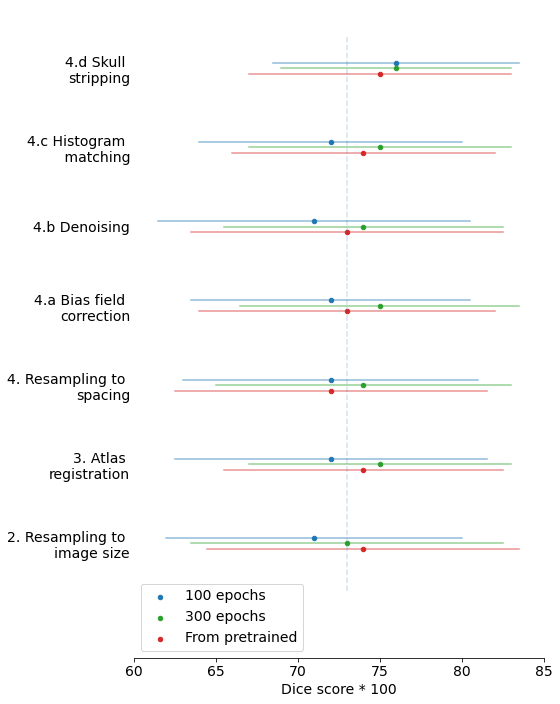

In [50]:
font = {'size'   : 14}
plt.rc('font', **font)


plt.figure(figsize=(8,10))
plot_err_bar(mean_100, y+0.35, std_100, c='tab:blue', label='100 epochs')
plot_err_bar(mean_300, y, std_300, c='tab:green', label='300 epochs')
plot_err_bar(mean_transfer, y-0.35, std_transfer, c='tab:red', label='From pretrained')
plt.yticks(ticks = y[1:], labels=ylabel[1:])
plt.xlim(60, 85)
plt.xlabel('Dice score * 100')
ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis=u'y', which=u'both',length=0)
plt.plot([73, 73], [7,42], ls='--', alpha=0.2)

plt.legend(loc=3);
plt.tight_layout()

plt.savefig('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/error_bars_bgpd.png')

# First, traning for 300 epochs until convergence is always better than training for 100 epochs.
# Second, training until convergence from pre-trained weights from a smaller dataset, while not necessarily
# result in better mean Dice score, always decreses prediction standard deviation.
# Third, experiment with skull stripping is the only one statistically significantly better than the baseline experiment 
# (Resampling to spacing 1x1x1 mm), though it benefits from pretraining less than any other setups.
# Finally, we observe that with training from a pretrained state the differences between the setup
# with and without skull stripping are washed away.